## Decision Tree Classifier using Scikit-learn
1.Train a decision tree on the available breast cancer data in Wisconsin, considering a maximum depth of 2 and setting the random_state parameter to 42

2.Train a decision tree on this dataset with the radom_state parameter set to 17. Adjust the maximum depth and the maximum number of elements in the leaf on a five-fold cross-validation using GridSearchCV. Also, make predictions on the test set and evaluate the classification accuracy.

3.Variation of decision tree parameters.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split , GridSearchCV
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt

Loading the dataset and splitting it into train and test sets.

In [ ]:
data = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data['data'], data['target'],  random_state = 42, test_size = 0.2)

Creating and training the Decision Tree Classifier. Also, visualization of the tree using Graphviz.

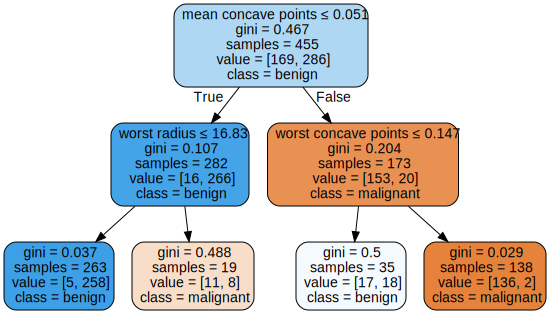

In [ ]:
classification_tree = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
classification_tree = classification_tree.fit(x_train, y_train)

data_depth = tree.export_graphviz(classification_tree, out_file=None,
                                  feature_names=data.feature_names,
                                  class_names=data.target_names,
                                  filled=True, rounded=True,
                                  special_characters=True)
graph = graphviz.Source(data_depth)
graph

Creating and training the Decision Tree Classifier with random_state = 17. Adjusting the maximum depth and the maximum number of elements in the leaf on a five-fold cross-validation using GridSearchCV.

Making predictions on the test set and evaluation the classification accuracy.

In [ ]:
param_grid = {
    'max_depth': list(range(1, 10)),
    'min_samples_leaf': list(range(1, 10)) }

dt_classifier = DecisionTreeClassifier(random_state=17)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)


y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Classification accuracy: {accuracy:.4f}")
print("Confusion matrix:",'\n' ,conf_matrix)
print("Classification metrics:", '\n',classification_rep)

Classification accuracy: 0.9474
Confusion matrix: 
 [[39  4]
 [ 2 69]]
Classification metrics: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Variation of decision tree parameters (the maximum depth)

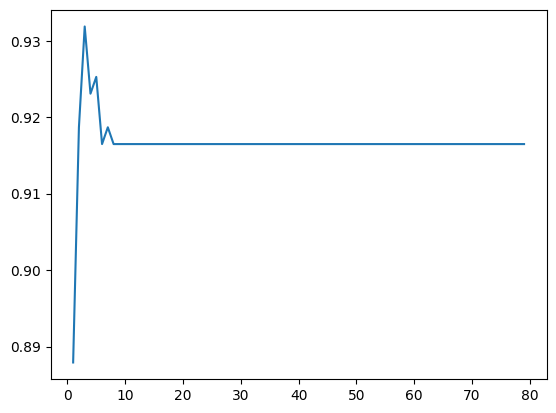

In [ ]:
param_grid_1 = {'max_depth': list(range(1, 80))}
dt_classifier_1 = DecisionTreeClassifier(random_state=42)

grid_search_1 = GridSearchCV(dt_classifier_1, param_grid_1, cv=5)
grid_search_1.fit(x_train, y_train)

plt.plot(list(range(1, 80)), grid_search_1.cv_results_['mean_test_score'])